In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import itertools
import warnings
warnings.filterwarnings('ignore')

# Erdos Graph

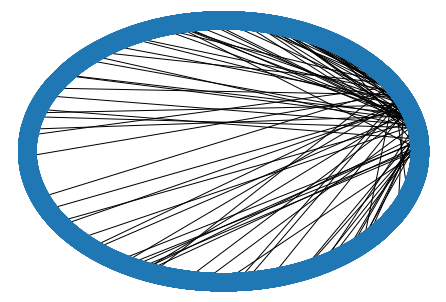

In [2]:
G_erdos = nx.read_pajek('ERDOS972.NET')
nx.draw_circular(G_erdos)

# Ants Graph

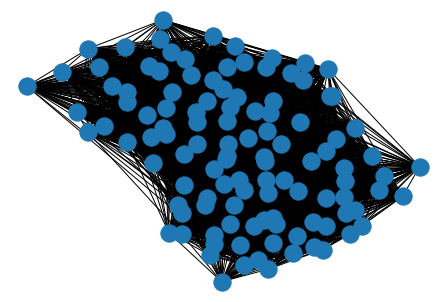

In [3]:
G_ants_edgelist = nx.read_weighted_edgelist('insecta-ant-colony1-day01.edges')
nx.draw(G_ants_edgelist)

# 1.

# Helper functions

In [4]:
# finds the mode
def mode(lst):
    d = {}
    for a in lst:
        if not a in d:
            d[a]=1
        else:
            d[a]+=1
    return [k for k,v in d.items() if v==max(d.values())]

# finds the communities for t+1 (synchronous)
def get_max_label(comms, neighbours):
    max_vals = []
    for i, k in zip(neighbours, range(len(neighbours))):
        if len(i) == 0:
            max_vals.append(comms[k])
        else:
            vals = []
            for j in i:
                vals.append(comms[j])
            if len(mode(vals))==1:
                max_vals.append(mode(vals)[0])
            else:
                max_vals.append(random.choice(mode(vals)))
    return max_vals

# finds the communities for t+1 (asynchronous)
def get_max_label_async(comms, rands, neighbours):
    temp = comms.copy()
    for i, k in zip(neighbours, rands):
        if len(i) == 0:
            continue
        else:
            vals = []
            for j in i:
                vals.append(temp[j])  
            if len(mode(vals))==1:
                temp[k] = mode(vals)[0]
            else:
                temp[k] = random.choice(mode(vals))
    return temp

# shuffles the order of a list
def random_order(G):
    lst=list(range(len(G.nodes())))
    random.shuffle(lst)
    return lst

# gets the adjacency matrix
def adjacency(G,lst):
    return nx.to_numpy_array(G)[lst,:]

# gets all the neighbours of a node after shuffeling
def get_list_neigh(mat):
    ind = []
    for i in mat:
        ind.append(list(np.where(i == 1)[0]))
    return ind

# Synchronous function

In [5]:
# synchronous 
def synchronous(G):
    t = np.arange(len(G.nodes()))
    t1 = np.arange(len(G.nodes()))
    switch = True
    while switch:
        t = t1 # update t
        adjacency_matrix = adjacency(G, list(range(len(G.nodes())))) # finds the adjacency matrix 
        neigh = get_list_neigh(adjacency_matrix) # neigbhours after to check communities
        t1 = get_max_label(t, neigh) # get the new communities
        switch = (list(t) != list(t1)) # when there is no update 
    return t1

# Asynchronous function

In [6]:
# asynchronous
def asynchronous(G):
    t = np.arange(len(G.nodes()))
    t1 = np.arange(len(G.nodes()))
    switch = True
    while switch:
        t = t1 # update t
        rand_update = random_order(G) # changes the order wach iteration
        adjacency_matrix = adjacency(G, rand_update) # finds the adjacency matrix for the shuffled nodes
        neigh = get_list_neigh(adjacency_matrix) # neigbhours after the shuffeling to check communities
        t1 = get_max_label_async(t, rand_update, neigh) # get the new communities
        switch = (list(t) != list(t1)) # when there is no update
    return t1
    

# Synchronous and Asynchronous Ants Graph

[102]
1


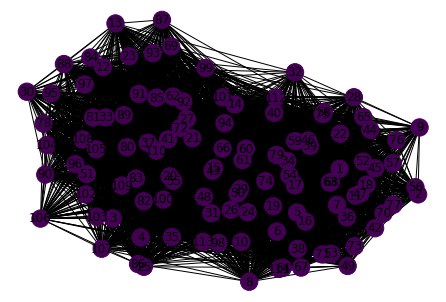

In [7]:
t1_ant_sync = synchronous(G_ants_edgelist)
print(np.unique(t1_ant_sync))
print(len(np.unique(t1_ant_sync)))
pos_ant = nx.spring_layout(G_ants_edgelist)
nx.draw(G_ants_edgelist, node_color=t1_ant_sync, with_labels=True, pos=pos_ant)

In [8]:
print(nx.is_connected(G_ants_edgelist))

True


In [9]:
len(G_ants_edgelist.edges)

4550

In [10]:
len(G_ants_edgelist.nodes)

113

In [11]:
(2 * len(G_ants_edgelist.edges)) / len(G_ants_edgelist.nodes)

80.53097345132744

We have 4550 edges and 113 nodes where the average degree per node is 81, also the graph is connected.
The Synchronous version converges, where all the nodes are in the same cluster, this is because it is highly connected.

[89]
1


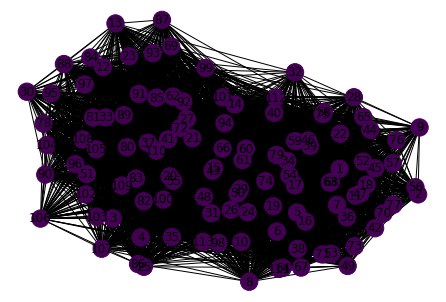

In [12]:
t1_ant_async = asynchronous(G_ants_edgelist)
print(np.unique(t1_ant_async))
print(len(np.unique(t1_ant_async)))
nx.draw(G_ants_edgelist, node_color=t1_ant_async, with_labels=True, pos=pos_ant)

Same as in the Synchronous model also here we see that all the nodes belong to the same cluster. The reason is the same.

# Synchronous and Asynchronous Erdos Graph

First lets check some properties of the graph.

In [13]:
nx.is_connected(G_erdos)

False

In [14]:
nx.number_connected_components(G_erdos)

4996

In [15]:
len(G_erdos.nodes)

5488

In [16]:
len(G_erdos.edges)

492

In [17]:
(2 * len(G_erdos.edges)) / len(G_erdos.nodes)

0.1793002915451895

This graph on the other hand has a huge number of nodes (5488 of them) and a small number of edges 492. We also see that this graph is not connected and it has 4996 connected components. The average node degree is 0.18 which is very low and gives us a hint that most of the nodes are isolated nodes, so the number of clusters will be high.

In [18]:
# t1_Erdos_sync = synchronous(G_erdos)
# print(np.unique(t1_Erdos_sync))
# print(len(np.unique(t1_Erdos_sync)))
# nx.draw_circular(G_erdos, node_color=t1_Erdos_sync)
# # doesn't converge, I tried it multiple times

The Synchronous version doesn't converge since since we have a lot of connected components that are formed only by two nodes and the algorithm goes back and forth in each iteration deciding what cluster should those node be in.

[   0    1    2 ... 5485 5486 5487]
5467


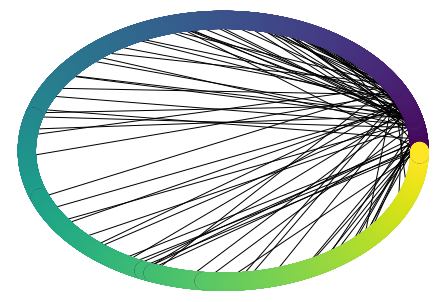

In [19]:
t1_Erdos_async = asynchronous(G_erdos)
print(np.unique(t1_Erdos_async))
print(len(np.unique(t1_Erdos_async)))
pos_Erdos = nx.circular_layout(G_erdos)
nx.draw(G_erdos, node_color=t1_Erdos_async, pos=pos_Erdos)

The Asynchronous algorithm converges and solves the problem of the Synchronous algorithm. We observe that we have 5467 clusters which is not a surprise since we saw that the average degree of nodes was very small. 

# 2.

# Hierarchical clustering - Ants Graph

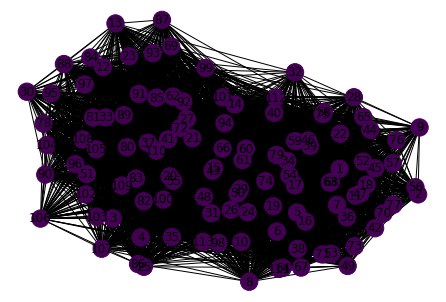

In [20]:
from sklearn.cluster import AgglomerativeClustering
from networkx.algorithms.shortest_paths.dense import floyd_warshall_numpy

# find the shortest path between all the nodes
distance_matrix = floyd_warshall_numpy(G_ants_edgelist)

# Hierarchical Clustering with n_cluster=1 same as the synchronous and asynchronous one
cluster = AgglomerativeClustering(n_clusters=1, affinity='precomputed', linkage='average')

# fit the dataset
cluster.fit(distance_matrix)

# get the clusters
t1_ant_hier = cluster.labels_

nx.draw(G_ants_edgelist, node_color=t1_ant_hier, with_labels=True, pos=pos_ant)

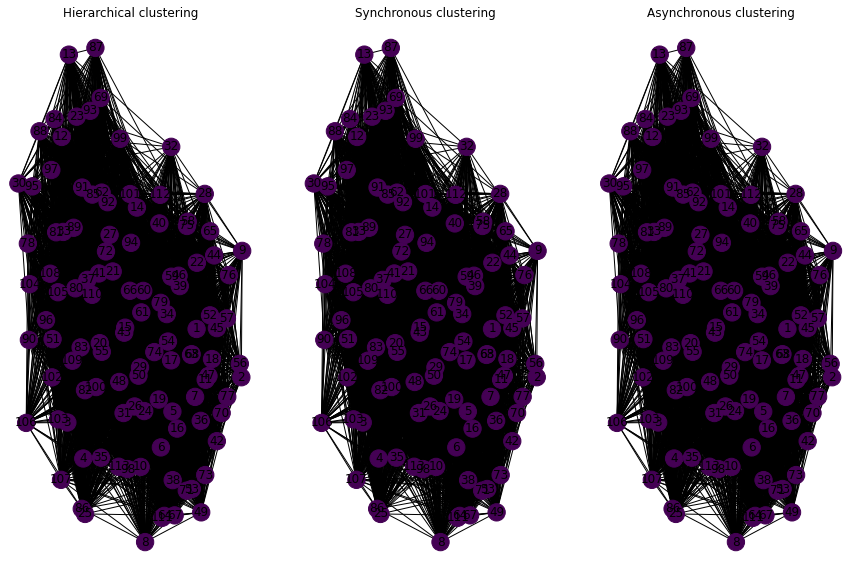

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

nx.draw(G_ants_edgelist, node_color=t1_ant_hier, with_labels=True, pos=pos_ant, ax=ax[0])
ax[0].set_title('Hierarchical clustering')

nx.draw(G_ants_edgelist, node_color=t1_ant_sync, with_labels=True, pos=pos_ant, ax=ax[1])
ax[1].set_title('Synchronous clustering')

nx.draw(G_ants_edgelist, node_color=t1_ant_async, with_labels=True, pos=pos_ant, ax=ax[2])
ax[2].set_title('Asynchronous clustering')

plt.show()

I didn't use different linkage methods for this graph since we have only one cluster and we would have the same output from all of them.

# 3.

# KMeans - Ants Graph

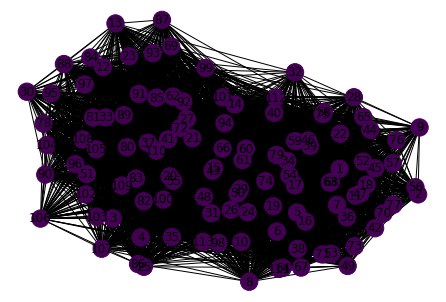

In [22]:
from sklearn.cluster import KMeans

# KMeans Clustering with n_cluster=1 same as the synchronous and asynchonous one
cluster = KMeans(n_clusters=1)

# fit the dataset
cluster.fit(distance_matrix)

# get the clusters
t1_ant_kmeans = cluster.labels_

nx.draw(G_ants_edgelist, node_color=t1_ant_kmeans, with_labels=True, pos=pos_ant)

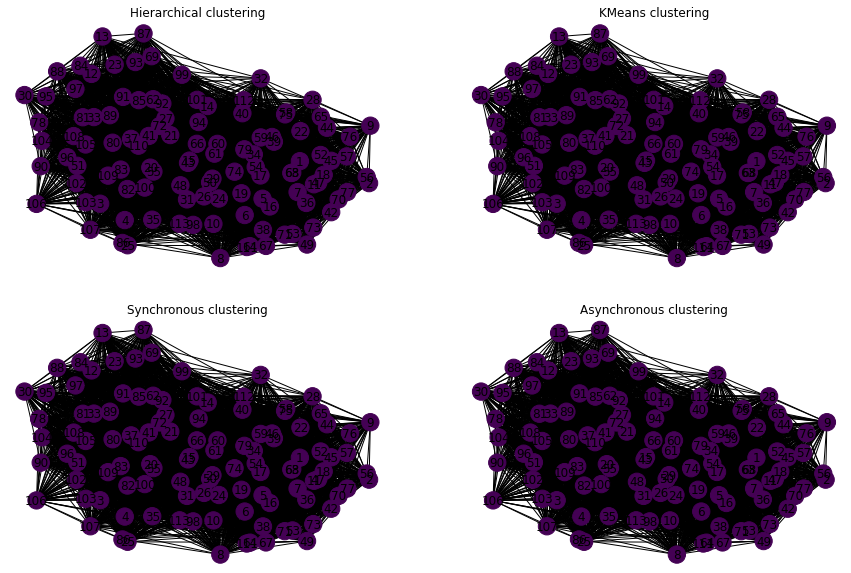

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

nx.draw(G_ants_edgelist, node_color=t1_ant_hier, with_labels=True, pos=pos_ant, ax=ax[0,0])
ax[0,0].set_title('Hierarchical clustering')

nx.draw(G_ants_edgelist, node_color=t1_ant_kmeans, with_labels=True, pos=pos_ant, ax=ax[0,1])
ax[0,1].set_title('KMeans clustering')

nx.draw(G_ants_edgelist, node_color=t1_ant_sync, with_labels=True, pos=pos_ant, ax=ax[1,0])
ax[1,0].set_title('Synchronous clustering')

nx.draw(G_ants_edgelist, node_color=t1_ant_async, with_labels=True, pos=pos_ant, ax=ax[1,1])
ax[1,1].set_title('Asynchronous clustering')

plt.show()

As there is only one cluster, we have similar results for the graph.

# 2.

# Hierarchical clustering - Erdos Graph

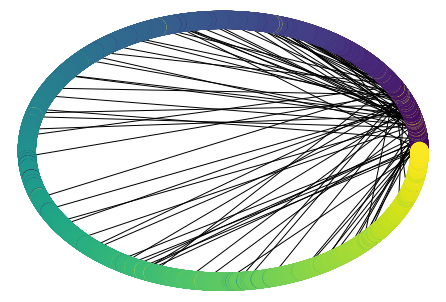

In [24]:
from sklearn.cluster import AgglomerativeClustering
from networkx.algorithms.shortest_paths.dense import floyd_warshall_numpy

# find the shortest path between all the nodes
distance_matrix = floyd_warshall_numpy(G_erdos)

# we fill the infinite entries with the sum of all degrees squared
from numpy import inf
distance_matrix[distance_matrix == inf] = sum([val**2 for (node, val) in G_erdos.degree()])

# Hierarchical Clustering with n_cluster=5467 same as the asynchonous one
cluster = AgglomerativeClustering(n_clusters=5467, affinity='precomputed', linkage='average')

# fit the dataset
cluster.fit(distance_matrix)

# get the clusters
t1_Erdos_hier = cluster.labels_

# reversing the order of cluster numbers so we have a similar sequence of colors in both graphs below
t1_Erdos_hier = np.array([np.max(t1_Erdos_hier)]*5488) - t1_Erdos_hier

nx.draw(G_erdos, node_color=t1_Erdos_hier, pos=pos_Erdos)

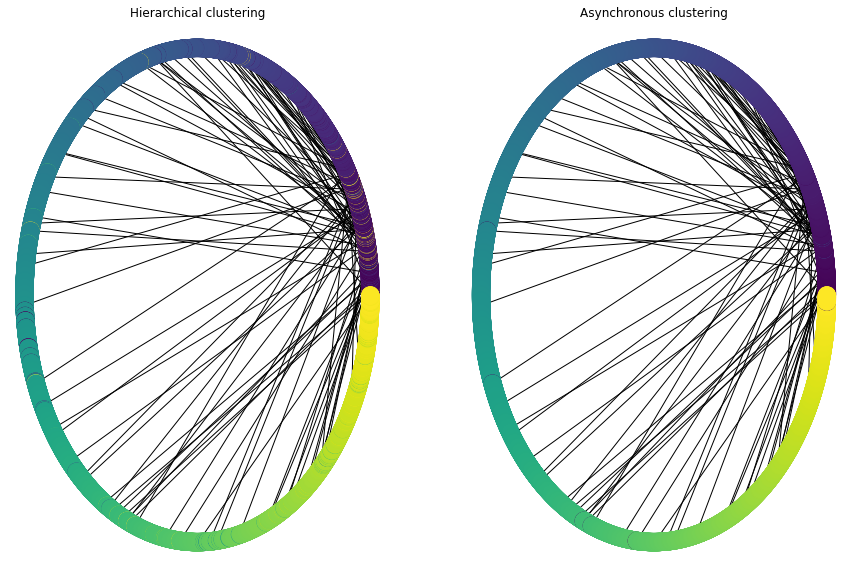

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
nx.draw(G_erdos, node_color=t1_Erdos_hier, pos=pos_Erdos, ax=ax[0])
ax[0].set_title('Hierarchical clustering')
nx.draw(G_erdos, node_color=t1_Erdos_async, pos=pos_Erdos, ax=ax[1])
ax[1].set_title('Asynchronous clustering')
plt.show()

When we have both graphs side by side we observe that there are noticeable differences especially in the purple and the cyan part of the graph. 

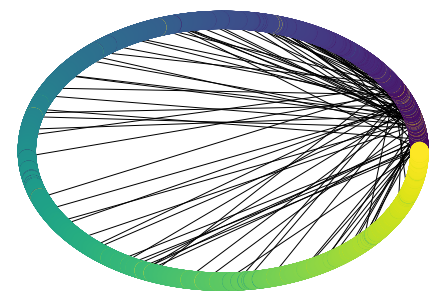

In [26]:
# Hierarchical Clustering with n_cluster=5467 same as the asynchronous one
cluster = AgglomerativeClustering(n_clusters=5467, affinity='precomputed', linkage='complete')

# fit the dataset
cluster.fit(distance_matrix)

# get the clusters
t1_Erdos_hier_complete = cluster.labels_

# reversing the order of cluster numbers so we have a similar sequence of colors in both graphs below
t1_Erdos_hier_complete = np.array([np.max(t1_Erdos_hier_complete)]*5488) - t1_Erdos_hier_complete

nx.draw(G_erdos, node_color=t1_Erdos_hier_complete, pos=pos_Erdos)

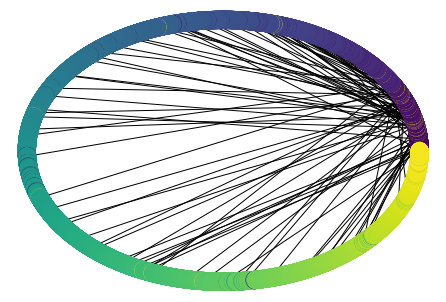

In [27]:
# Hierarchical Clustering with n_cluster=5467 same as the asynchonous one
cluster = AgglomerativeClustering(n_clusters=5467, affinity='precomputed', linkage='single')

# fit the dataset
cluster.fit(distance_matrix)

# get the clusters
t1_Erdos_hier_single = cluster.labels_

# reversing the order of cluster numbers so we have a similar sequence of colors in both graphs below
t1_Erdos_hier_single = np.array([np.max(t1_Erdos_hier_single)]*5488) - t1_Erdos_hier_single

nx.draw(G_erdos, node_color=t1_Erdos_hier_single, pos=pos_Erdos)

# 3.

# Kmeans clustering - Erdos Graph

We would like to have faster convergence by choosing different initial centroids.

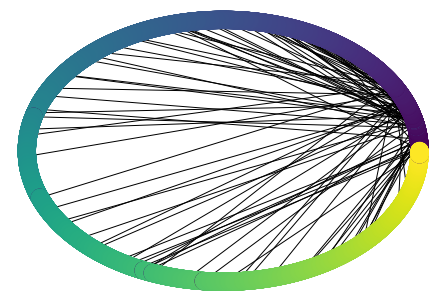

In [28]:
# to have faster convergence we will give as initial centroids the centroids from asymmetrical clustering

# first create a dataframe
df = pd.DataFrame(distance_matrix)
df['clusters'] = t1_Erdos_async

# group by cluster
grouped = df.groupby('clusters')

centroids = []
for group_name, df_group in grouped:
    centroids.append(df_group.iloc[0,:-1])
    
centroids = np.array(centroids)

# KMeans Clustering with n_cluster=5467 same as the asynchonous one
cluster = KMeans(n_clusters=5467, init=np.array(centroids))
# fit the dataset
cluster.fit(distance_matrix)
# get the clusters
t1_Erdos_kmeans = cluster.labels_

nx.draw(G_erdos, node_color=t1_Erdos_kmeans, pos=pos_Erdos)

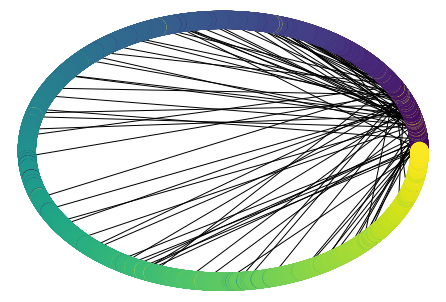

In [29]:
# to have faster convergence we will give as initial centroids the centroids from hierachical clustering, average

# first create a dataframe
df = pd.DataFrame(distance_matrix)
df['clusters'] = t1_Erdos_hier

# group by cluster
grouped = df.groupby('clusters')

centroids = []
for group_name, df_group in grouped:
    centroids.append(df_group.iloc[0,:-1])
    
centroids_hier = np.array(centroids)

# KMeans Clustering with n_cluster=5467 same as the asynchonous one
cluster = KMeans(n_clusters=5467, init=np.array(centroids_hier))
# fit the dataset
cluster.fit(distance_matrix)
# get the clusters
t1_Erdos_kmeans_average = cluster.labels_

nx.draw(G_erdos, node_color=t1_Erdos_kmeans_average, pos=pos_Erdos)

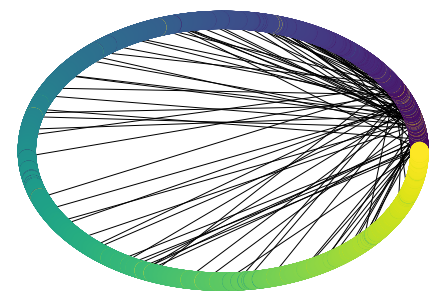

In [30]:
# to have faster convergence we will give as initial centroids the centroids from hierachical clustering, complete

# first create a dataframe
df = pd.DataFrame(distance_matrix)
df['clusters'] = t1_Erdos_hier_complete

# group by cluster
grouped = df.groupby('clusters')

centroids = []
for group_name, df_group in grouped:
    centroids.append(df_group.iloc[0,:-1])
    
centroids_hier = np.array(centroids)

# KMeans Clustering with n_cluster=5467 same as the asynchonous one
cluster = KMeans(n_clusters=5467, init=np.array(centroids_hier))
# fit the dataset
cluster.fit(distance_matrix)
# get the clusters
t1_Erdos_kmeans_complete = cluster.labels_

nx.draw(G_erdos, node_color=t1_Erdos_kmeans_complete, pos=pos_Erdos)

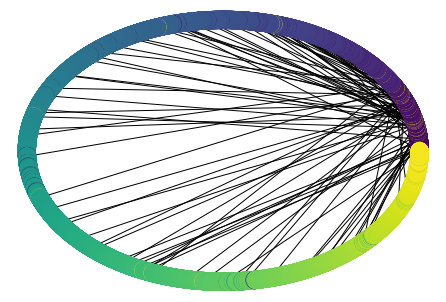

In [31]:
# to have faster convergence we will give as initial centroids the centroids from hierachical clustering, single

# first create a dataframe
df = pd.DataFrame(distance_matrix)
df['clusters'] = t1_Erdos_hier_single

# group by cluster
grouped = df.groupby('clusters')

centroids = []
for group_name, df_group in grouped:
    centroids.append(df_group.iloc[0,:-1])
    
centroids_hier = np.array(centroids)

# KMeans Clustering with n_cluster=5467 same as the asynchonous one
cluster = KMeans(n_clusters=5467, init=np.array(centroids_hier))
# fit the dataset
cluster.fit(distance_matrix)
# get the clusters
t1_Erdos_kmeans_single = cluster.labels_

nx.draw(G_erdos, node_color=t1_Erdos_kmeans_single, pos=pos_Erdos)

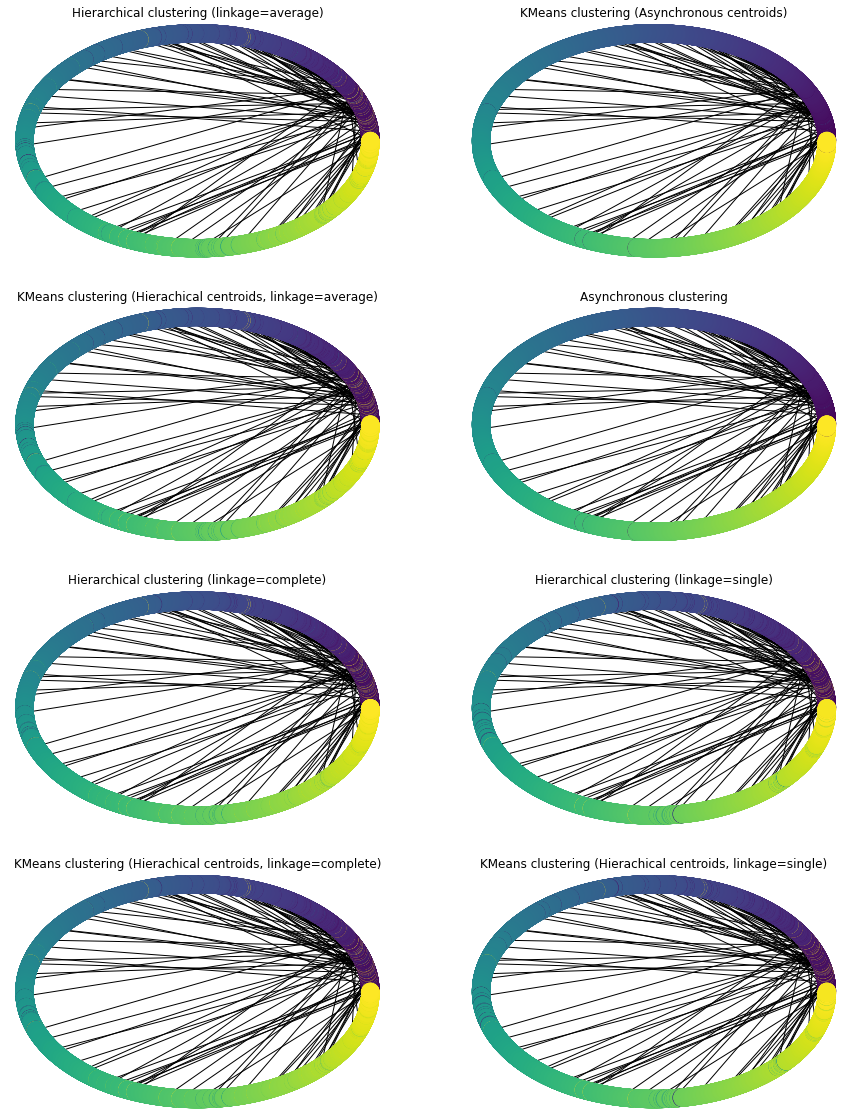

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
nx.draw(G_erdos, node_color=t1_Erdos_hier, pos=pos_Erdos, ax=ax[0,0])
ax[0,0].set_title('Hierarchical clustering (linkage=average)')
nx.draw(G_erdos, node_color=t1_Erdos_kmeans, pos=pos_Erdos, ax=ax[0,1])
ax[0,1].set_title('KMeans clustering (Asynchronous centroids)')
nx.draw(G_erdos, node_color=t1_Erdos_async, pos=pos_Erdos, ax=ax[1,1])
ax[1,1].set_title('Asynchronous clustering')
nx.draw(G_erdos, node_color=t1_Erdos_kmeans_average, pos=pos_Erdos, ax=ax[1,0])
ax[1,0].set_title('KMeans clustering (Hierachical centroids, linkage=average)')
nx.draw(G_erdos, node_color=t1_Erdos_hier_complete, pos=pos_Erdos, ax=ax[2,0])
ax[2,0].set_title('Hierarchical clustering (linkage=complete)')
nx.draw(G_erdos, node_color=t1_Erdos_hier_single, pos=pos_Erdos, ax=ax[2,1])
ax[2,1].set_title('Hierarchical clustering (linkage=single)')
nx.draw(G_erdos, node_color=t1_Erdos_kmeans_complete, pos=pos_Erdos, ax=ax[3,0])
ax[3,0].set_title('KMeans clustering (Hierachical centroids, linkage=complete)')
nx.draw(G_erdos, node_color=t1_Erdos_kmeans_single, pos=pos_Erdos, ax=ax[3,1])
ax[3,1].set_title('KMeans clustering (Hierachical centroids, linkage=single)')
plt.show()

All the algorithms seem to group the nodes in a similar way. The KMeans algorithm groups the nodes in the most similar way to the algorithm from which we chose the initial centroids. If we did not use the initial centroids then the algorithms did not converge due to the large number of clusters and connected components.

# Directed Graph

The following is just to show that the algorithms work for directed graphs as well.

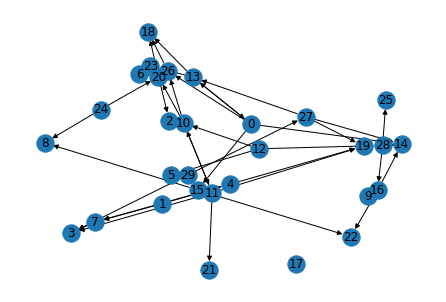

In [33]:
G = nx.gnm_random_graph(30, 45, directed=True)
pos_dir = nx.spring_layout(G)
nx.draw(G, with_labels=True, pos=pos_dir)

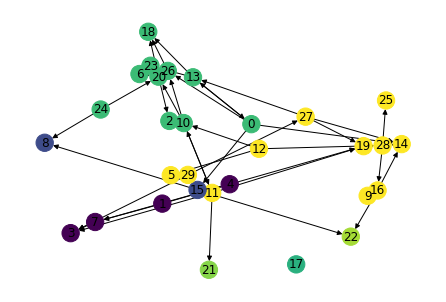

In [34]:
# Synchronous
nx.draw(G, with_labels=True, node_color=synchronous(G), pos=pos_dir)

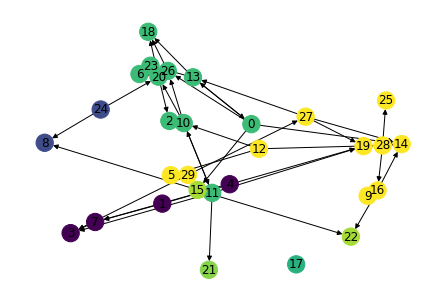

In [35]:
# Asynchronous
nx.draw(G, with_labels=True, node_color=asynchronous(G),pos=pos_dir)

We see that the clusters are the same except node 24.